In [1]:
!pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

In [2]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

In [1]:
import tensorflow as tf
#import dlmodels
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.utils as kutils
import sklearn.ensemble
import sklearn.metrics
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
td = pd.read_parquet('oil_spill_training_dataset.parquet') #td = training data
vd = pd.read_parquet('oil_spill_validation_dataset.parquet') #vd = validation data
# image dataframe
train_prq_path = "oil_spill_training_dataset.parquet"
val_prq_path = "oil_spill_validation_dataset.parquet"
datasets_2 = "oil_spill_training_dataset-2.parquet"
train_df = pd.read_parquet(train_prq_path)
train_df = pd.read_parquet(val_prq_path)
train_df_2 = pd.read_parquet(datasets_2)
# train_df.shape, val_df.shape, train_df_2.shape


In [4]:
pwd

'/data/private/AIA_Assignment/Oil Spill Detection Dataset'

## EDA

In [81]:
td

,Red,labels,glcm
0,0.647059,0,0
1,0.984314,0,0
2,0.678431,0,0
3,0.650980,0,0
4,0.780392,0,0
...,...,...,...
92159995,0.356863,0,0
92159996,0.388235,0,0
92159997,0.439216,0,0
92159998,0.360784,0,0


In [6]:
vd

,Red,labels,glcm
0,0.529412,0,13
1,0.937255,0,0
2,0.690196,0,0
3,0.694118,0,2
4,0.709804,0,0
...,...,...,...
10444795,0.345098,0,0
10444796,0.337255,0,0
10444797,0.411765,0,0
10444798,0.407843,0,0


In [7]:
td.shape, vd.shape

((92160000, 3), (10444800, 3))

In [8]:
td.describe

<bound method NDFrame.describe of                Red  labels  glcm
0         0.647059       0     0
1         0.984314       0     0
2         0.678431       0     0
3         0.650980       0     0
4         0.780392       0     0
...            ...     ...   ...
92159995  0.356863       0     0
92159996  0.388235       0     0
92159997  0.439216       0     0
92159998  0.360784       0     0
92159999  0.317647       0     0

[92160000 rows x 3 columns]>

In [9]:
td.dtypes

Red       float64
labels      uint8
glcm       uint32
dtype: object

In [10]:
td.isnull, td.isnull().sum()

(<bound method DataFrame.isnull of                Red  labels  glcm
 0         0.647059       0     0
 1         0.984314       0     0
 2         0.678431       0     0
 3         0.650980       0     0
 4         0.780392       0     0
 ...            ...     ...   ...
 92159995  0.356863       0     0
 92159996  0.388235       0     0
 92159997  0.439216       0     0
 92159998  0.360784       0     0
 92159999  0.317647       0     0
 
 [92160000 rows x 3 columns]>,
 Red       0
 labels    0
 glcm      0
 dtype: int64)

In [11]:
grouped_data = td.groupby('labels')
sum_values = grouped_data.sum()
sum_values

,Red,glcm
labels,,
0,4.290868e+07,81843644
1,3.986818e+06,6906001
2,4.832856e+05,1698762
3,3.452159e+05,1198861
4,4.366018e+04,224732


In [12]:
class_counts = td['labels'].value_counts()
# Print the number of samples per class
print(class_counts)

0    81732526
1     6679422
2     1897974
3     1597893
4      252185
Name: labels, dtype: int64


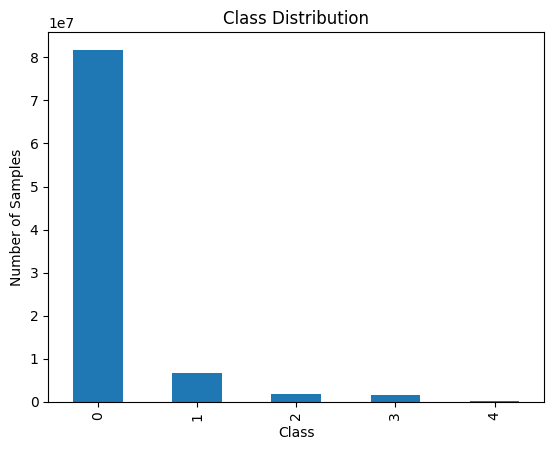

In [13]:
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [35]:
# Slice the dataset to create a smaller subset
# For example, you can take the first 10,000 rows
# subset_size = 30000
# data_subset = td.head(subset_size)

In [36]:
data_subset

,Red,labels,glcm
0,0.647059,0,0
1,0.984314,0,0
2,0.678431,0,0
3,0.650980,0,0
4,0.780392,0,0
...,...,...,...
29995,0.513725,0,0
29996,0.529412,0,0
29997,0.619608,0,0
29998,0.713725,0,0


In [37]:
data_subset.shape

(30000, 3)

In [38]:
class_counts = data_subset['labels'].value_counts()
# Print the number of samples per class
print(class_counts)

0    29982
1       18
Name: labels, dtype: int64


In [52]:
td

,Red,labels,glcm
0,0.647059,0,0
1,0.984314,0,0
2,0.678431,0,0
3,0.650980,0,0
4,0.780392,0,0
...,...,...,...
92159995,0.356863,0,0
92159996,0.388235,0,0
92159997,0.439216,0,0
92159998,0.360784,0,0


## FEATURE ENGINEERING 

In [45]:
# Calculate basic statistical features
statistical_features = td['Red'].agg(['mean', 'std', 'min', 'max', 'median'])


In [46]:
# Add these features to your DataFrame
td = td.join(statistical_features, rsuffix='_stat')

In [47]:
td

,Red,labels,glcm,Red_stat
0,0.647059,0,0,NaN
1,0.984314,0,0,NaN
2,0.678431,0,0,NaN
3,0.650980,0,0,NaN
4,0.780392,0,0,NaN
...,...,...,...,...
92159995,0.356863,0,0,NaN
92159996,0.388235,0,0,NaN
92159997,0.439216,0,0,NaN
92159998,0.360784,0,0,NaN


## SHUFFLE DATA

In [6]:
from sklearn.utils import shuffle

# Assuming you have your dataset in variables X and y

# Shuffle the DataFrame
shuffled_df = shuffle(td, random_state=42)


In [7]:
shuffled_df

,Red,labels,glcm
14113788,0.054902,0,0
57922652,0.015686,0,0
77875291,0.666667,0,2
5508805,0.513725,0,0
28907144,0.643137,0,0
...,...,...,...
13315092,0.094118,0,0
21081788,0.364706,0,0
56882282,0.407843,0,2
56755036,0.392157,0,0


In [8]:
shuffled_df.head()

,Red,labels,glcm
14113788,0.054902,0,0
57922652,0.015686,0,0
77875291,0.666667,0,2
5508805,0.513725,0,0
28907144,0.643137,0,0


# Downsampling data an d upsampling


In [9]:
vd.head(0)

,Red,labels,glcm


In [10]:
vd.groupby('labels').count() , vd.shape

(            Red     glcm
 labels                  
 0       9337961  9337961
 1        816494   816494
 2        154361   154361
 3         96344    96344
 4         39640    39640,
 (10444800, 3))

In [11]:
td.head(0)

,Red,labels,glcm


In [12]:
#downsampling TRAINING DATA by reducing number of instaces in majority class ####may loss information
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(td[['Red','glcm']], td['labels'])

In [13]:
td.shape, X_resampled.shape, y_resampled.shape

((92160000, 3), (1260925, 2), (1260925,))

In [110]:
td.groupby('labels').count()

,Red,glcm
labels,,
0,81732526,81732526
1,6679422,6679422
2,1897974,1897974
3,1597893,1597893
4,252185,252185


In [111]:
y_resampled.value_counts()

0    252185
1    252185
2    252185
3    252185
4    252185
Name: labels, dtype: int64

In [37]:
# Create a new DataFrame from the resampled data
resampled_df = pd.DataFrame(data=X_resampled, columns=['Red', 'glcm'])
resampled_df['labels'] = y_resampled

In [38]:
resampled_df.shape

(1260925, 3)

In [10]:
#downsampling VALIDATION DATA by reducing number of instaces in majority class ####may loss information
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(vd[['Red','glcm']], vd['labels'])

In [14]:
resampled_vd = pd.DataFrame(data=X_resampled, columns=['Red', 'glcm'])
resampled_vd['labels'] = y_resampled
resampled_vd

,Red,glcm,labels
1470233,0.741176,7,0
9217667,0.615686,0,0
1642105,0.298039,0,0
4393528,0.278431,0,0
4446574,0.501961,0,0
...,...,...,...
2130464,0.333333,0,4
2130783,0.223529,0,4
2130784,0.231373,0,4
2130785,0.176471,0,4


In [19]:
resampled_vd.value_counts()

Red       glcm  labels
1.000000  0     1         2676
0.000000  0     2         1309
                3          794
                1          708
0.168627  0     4          622
                          ... 
0.270588  9     2            1
                4            1
          10    3            1
                4            1
1.000000  194   1            1
Length: 11081, dtype: int64

In [20]:
resampled_vd.groupby('labels').count()

,Red,glcm
labels,,
0,39640,39640
1,39640,39640
2,39640,39640
3,39640,39640
4,39640,39640


In [22]:
#upsampling by generating synthetic examples
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(td[['Red','glcm']], td['labels'])

In [23]:
# Create a new DataFrame from the resampled data
upsampled_df = pd.DataFrame(data=X_resampled, columns=['Red', 'glcm'])
upsampled_df['labels'] = y_resampled

In [24]:
upsampled_df

,Red,glcm,labels
47548785,0.690196,0,0
18563873,0.811765,0,0
58202918,0.411765,0,0
31974221,0.682353,3,0
52447749,0.639216,0,0
...,...,...,...
91730326,0.509804,0,4
91730327,0.576471,0,4
91730330,0.450980,0,4
91730332,0.243137,0,4


In [112]:
upsampled_df.groupby('labels').count()

,Red,glcm
labels,,
0,252185,252185
1,252185,252185
2,252185,252185
3,252185,252185
4,252185,252185


## Model development process

# downsampled output

In [6]:
#define feature and target
X = resampled_df.drop('labels', axis=1)
y = resampled_df['labels']


NameError: name 'resampled_df' is not defined

In [98]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
# Define class weights (adjust weights as needed)
#class_weights = {0: 1, 1: 5, 2: 10, 3: 10, 4: 10}

In [115]:
# Define hyperparameters
n_estimators = 200
max_depth = None
# min_samples_split = 2
# min_samples_leaf = 1

In [116]:
rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

In [117]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [118]:
y_pred = rf_model.predict(X_test)

In [5]:
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

NameError: name 'accuracy_score' is not defined

In [4]:
print(f'Accuracy: {accuracy:.2f}')
#print("Confusion Matrix:\n", conf_matrix)
print('Classification Report:\n', report)

NameError: name 'accuracy' is not defined

# upsampled output

In [25]:
#define feature and target
X = upsampled_df.drop('labels', axis=1)
y = upsampled_df['labels']

In [27]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,)

In [28]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)

In [29]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

In [32]:
y_pred = rf_model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [34]:
print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print('Classification Report:\n', report)

Accuracy: 0.40
Confusion Matrix:
 [[43256 13783  7200  3285  7926]
 [19434 34710  4304  4314 12861]
 [18522  2620  9803  9866 34940]
 [14481  1008  8599 10621 40987]
 [ 7328   625  7450  8777 51578]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.57      0.48     75450
           1       0.66      0.46      0.54     75623
           2       0.26      0.13      0.17     75751
           3       0.29      0.14      0.19     75696
           4       0.35      0.68      0.46     75758

    accuracy                           0.40    378278
   macro avg       0.40      0.40      0.37    378278
weighted avg       0.40      0.40      0.37    378278



In [39]:
# Extract the features and target variable for training and validation
X_train = resampled_df.drop("labels", axis=1)
y_train = resampled_df["labels"]

X_val = resampled_vd.drop("labels", axis=1)
y_val = resampled_vd["labels"]

In [40]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)

In [41]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [42]:
y_pred = rf_model.predict(X_val)

In [43]:
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

In [44]:
print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print('Classification Report:\n', report)

Accuracy: 0.40
Confusion Matrix:
 [[22996  6990  4695  1555  3404]
 [10032 16592  2197  2876  7943]
 [ 5329  1584  3576  5763 23388]
 [13460  1020  7078  4686 13396]
 [  400   139  3665  4584 30852]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.58      0.50     39640
           1       0.63      0.42      0.50     39640
           2       0.17      0.09      0.12     39640
           3       0.24      0.12      0.16     39640
           4       0.39      0.78      0.52     39640

    accuracy                           0.40    198200
   macro avg       0.37      0.40      0.36    198200
weighted avg       0.37      0.40      0.36    198200

